In [16]:
from pathlib import Path

while Path.cwd().name != 'language-model-toxicity':
    %cd ..

In [17]:
import pandas as pd
from hashlib import md5
import tldextract

from utils.constants import TEXTS_DIR, DATA_DIR

## Load URLs for OpenWebText

In [18]:
def get_domain(url):
    ext = tldextract.extract(url)
    if ext.domain == 'wordpress':
        return '.'.join(ext)
    else:
        return '.'.join(ext[1:])


def make_urls_df():
    rows = []
    for file in URLS_DIR.iterdir():
        urls = file.read_text().split()
        rows_from_file = [(url, md5(url.encode()).hexdigest()) for url in urls]
        rows.extend(rows_from_file)

    df = pd.DataFrame(rows, columns=['url', 'md5_hash'])
    df['domain'] = df['url'].apply(lambda url: get_domain(url))
    return df


def make_filenames_df():
    rows = [(file.name, file.name.split('-')[1].split('.')[0]) 
            for file in TEXTS_DIR.iterdir()]
    return pd.DataFrame(rows, columns=['filename', 'md5_hash'])

In [19]:
urls_file = DATA_DIR / 'openwebtext-urls.csv'

if urls_file.exists():
    urls = pd.read_csv(urls_file)
else:
    pass
    urls = make_urls_df()
    filenames = make_filenames_df()
    urls = urls.merge(filenames)
    urls.to_csv(urls_file, index=False)

In [20]:
urls.head()

,url,filename,domain
0,http://www.guardian.co.uk/world/2010/may/31/pu...,0610905-8d5bdc4f88bed43e4f5f606a43bf4d61.txt,guardian.co.uk
1,http://links.org.au/node/1719,0147024-8b731d228ad09fcff1cc3ed6e06450bb.txt,links.org.au
2,http://www.tricycle.com/blog/?p=1782,0286995-93a6dcb796e6448bbeebd07b5379956d.txt,tricycle.com
3,http://www.sciencebasedmedicine.org/?p=5339,0155423-cb5aead54795dbfc57a56ccd1dab5830.txt,sciencebasedmedicine.org
4,http://www.itbusiness.ca/it/client/en/home/New...,0019075-4f9b2593bd76ccdd1aede0c220045cec.txt,itbusiness.ca


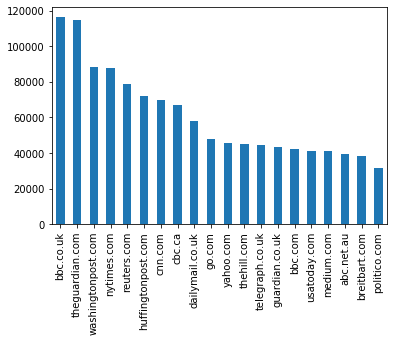

In [21]:
urls['domain'].value_counts()[:20].plot(kind='bar')

In [22]:
# TODO: plot the concentration in certain domains vs total population

## Cross-reference domains

In [23]:
subsample_dir = DATA_DIR / 'subsample-100k'

In [24]:
docs = pd.read_csv(subsample_dir / 'docs.csv')

In [25]:
docs = docs.merge(urls)
docs

,filename,insult,severe_toxicity,toxicity,profanity,sexually_explicit,flirtation,identity_attack,threat,url,domain
0,0765989-85ee86c9a7f4c4d907c88f7c228e0993.txt,0.166259,0.095567,0.210174,0.158753,0.184674,0.438737,0.166551,0.275649,https://www.gta5-mods.com/vehicles/civilian-st...,gta5-mods.com
1,0413785-8cbf5890b9c855b9b3948a3b7ecc5bc4.txt,0.237159,0.110659,0.218702,0.151735,0.154429,0.383025,0.276985,0.252646,http://howgoodisthat.wordpress.com/2011/07/06/...,howgoodisthat.wordpress.com
2,0737098-20caa78a189e92bc57f240dd868eb4aa.txt,0.077918,0.018136,0.062015,0.051664,0.096003,0.362622,0.106488,0.200510,https://www.macobserver.com/analysis/apple-mus...,macobserver.com
3,0515659-13b897846bc7bcefdbb3c4257af9e6fd.txt,0.210829,0.090574,0.210703,0.155614,0.133561,0.363002,0.310020,0.259051,http://www.3quarksdaily.com/3quarksdaily/2012/...,3quarksdaily.com
4,0581257-0ef524eaee4732e35a4c8579a0466bd6.txt,0.115500,0.039011,0.093650,0.097293,0.181966,0.387662,0.202243,0.223344,http://www.politico.com/news/stories/1112/8424...,politico.com
...,...,...,...,...,...,...,...,...,...,...,...
93867,0654080-c4311fdcadfb0155281d9c7fbb1cc324.txt,0.249497,0.163223,0.279961,0.187659,0.143322,0.387018,0.292027,0.390952,http://greenandblackmusic.com/home/2016/09/12/...,greenandblackmusic.com
93868,0945155-383c49316170b908d62e3901ce5cac2a.txt,0.224601,0.074300,0.205861,0.143784,0.107139,0.333164,0.268415,0.219009,http://www.vox.com/policy-and-politics/2017/4/...,vox.com
93869,0224093-d65526da751240afed7d032e355c8bb7.txt,0.119187,0.056591,0.119198,0.100447,0.186757,0.366368,0.210482,0.265610,https://fcpdnews.wordpress.com/2015/01/05/bank...,fcpdnews.wordpress.com
93870,0193804-e52dfd2b368c1f4390be9458d1b65f35.txt,0.089158,0.042683,0.083148,0.078585,0.135900,0.386534,0.139280,0.213621,http://www.ajc.com/news/news/local-obituaries/...,ajc.com


In [33]:
with open('reddit.jsonl') as f:
    responses = [json.loads(line) for line in f]

In [50]:
df = docs[:8702].copy()

In [51]:
first_matches = [x[0] if x else None for x in responses]
df['subreddit'] = [x['subreddit'] if x and 'subreddit' in x else None for x in first_matches]
df['title'] = [x['title'] if x and 'title' in x else None for x in first_matches]

In [54]:
df.to_csv('reddit_meta_sample.csv', index=False)

In [60]:
from collections import Counter

In [62]:
subreddit_counts = Counter(df.subreddit)

In [64]:
subreddit_counts.most_common(20)

[('politics', 314),
 ('POLITIC', 284),
 ('The_Donald', 182),
 ('worldnews', 174),
 ('todayilearned', 139),
 ('news', 134),
 ('india', 116),
 ('reddit.com', 94),
 ('australia', 71),
 ('conspiracy', 66),
 ('technology', 62),
 ('unitedkingdom', 55),
 ('canada', 50),
 ('nottheonion', 50),
 ('science', 49),
 ('Conservative', 47),
 ('soccer', 46),
 ('worldpolitics', 44),
 ('environment', 43),
 ('gaming', 42)]

In [65]:
[(name, count / len(df)) for name, count in subreddit_counts.most_common(20)]

[('politics', 0.03608365892898184),
 ('POLITIC', 0.03263617559181797),
 ('The_Donald', 0.020914732245460813),
 ('worldnews', 0.01999540335555045),
 ('todayilearned', 0.0159733394621926),
 ('news', 0.015398758905998622),
 ('india', 0.0133302689037003),
 ('reddit.com', 0.010802114456446793),
 ('australia', 0.008159043897954493),
 ('conspiracy', 0.0075844633417605145),
 ('technology', 0.007124798896805332),
 ('unitedkingdom', 0.006320386118133762),
 ('canada', 0.005745805561939784),
 ('nottheonion', 0.005745805561939784),
 ('science', 0.005630889450700988),
 ('Conservative', 0.005401057228223397),
 ('soccer', 0.005286141116984601),
 ('worldpolitics', 0.00505630889450701),
 ('environment', 0.004941392783268214),
 ('gaming', 0.004826476672029419)]